In [1]:
!pip install seaborn

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
# Task 1: Data Preprocessing
df.dropna(inplace=True)

In [5]:
# Task 2: Identify outliers.
# Calculate the distance between pickup and dropoff points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [6]:
df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [ ]:
from scipy.stats import zscore
df = df[(np.abs(zscore(df['fare_amount'])) < 3) & (np.abs(zscore(df['distance'])) < 3)]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


<Axes: ylabel='fare_amount'>

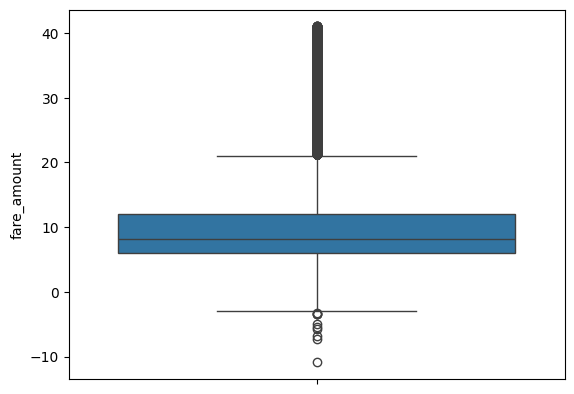

In [8]:
sns.boxplot(df['fare_amount'])

<Axes: ylabel='distance'>

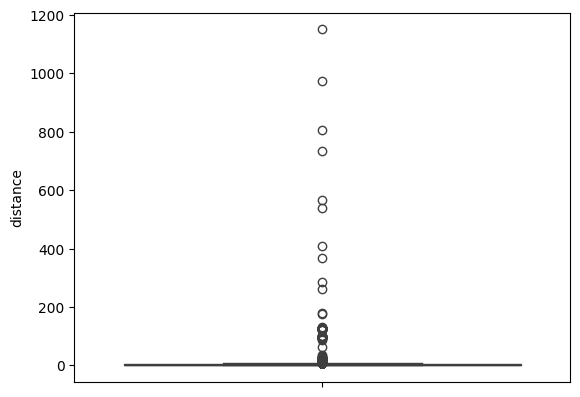

In [9]:
sns.boxplot(df['distance'])

In [10]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(df['fare_amount']>low) & (df['fare_amount']<high)]

<Axes: ylabel='fare_amount'>

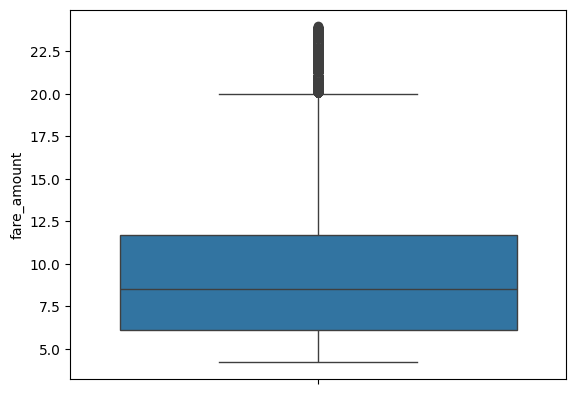

In [11]:
sns.boxplot(df['fare_amount'])

<Axes: xlabel='distance', ylabel='fare_amount'>

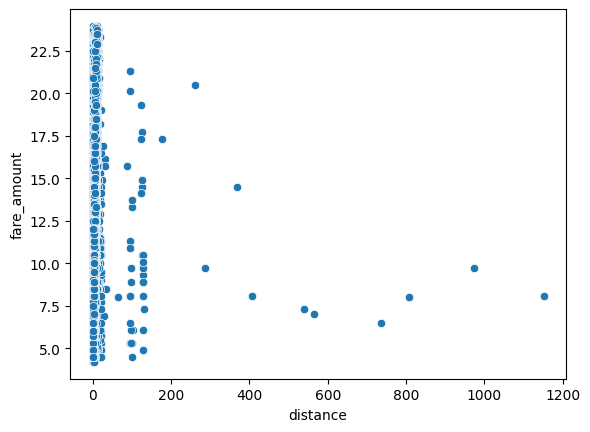

In [12]:
sns.scatterplot(x=df['distance'], y=df['fare_amount'])

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [14]:
df = df.drop(['key','pickup_datetime'],axis=1)

In [15]:
df.dtypes

Unnamed: 0             int64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
hour                   int32
day_of_week            int32
dtype: object

<Axes: >

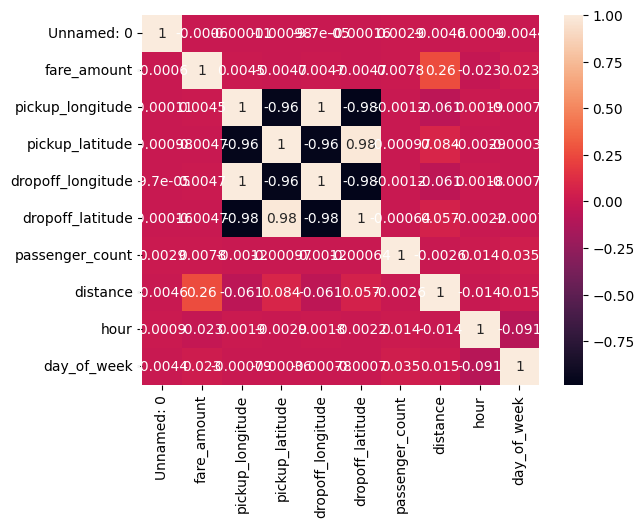

In [16]:
# Task 3: Check the correlation.
corr = df.corr()
sns.heatmap(corr, annot=True)

In [17]:
# Task 4: Model Implementation
from sklearn.model_selection import train_test_split
x = df[['distance', 'hour', 'day_of_week']]
y = df['fare_amount']

In [18]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [20]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [21]:
# Task 5: Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Model:")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}\n")

In [22]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Model:
R² Score: 0.080
RMSE: 4.034
MAE: 3.132

Random Forest Regression Model:
R² Score: 0.629
RMSE: 2.562
MAE: 1.851

